In [1]:
# Re-import necessary libraries
import torch
from torch import nn
import matplotlib.pyplot as plt

In [4]:
# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256 * 8 * 8),          # ✅ Match the training config
            nn.ReLU(),
            nn.Unflatten(1, (256, 8, 8)),         # ✅ Output shape = (256, 8, 8)
            nn.ConvTranspose2d(256, 128, 4, 2, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, 4, 2, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, 4, 2, 1),    # If RGB output
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)


In [8]:
# Load the Generator model
G = Generator().to(device)
G.load_state_dict(torch.load("generator.pth", map_location=device))
G.eval()
print("✅ Generator loaded successfully")

✅ Generator loaded successfully


In [9]:
# Generate images
z = torch.randn(16, 100).to(device)  # 16 random noise vectors
with torch.no_grad():
    generated_images = G(z).detach().cpu()

In [10]:
# Rescale from [-1, 1] to [0, 1]
generated_images = (generated_images + 1) / 2

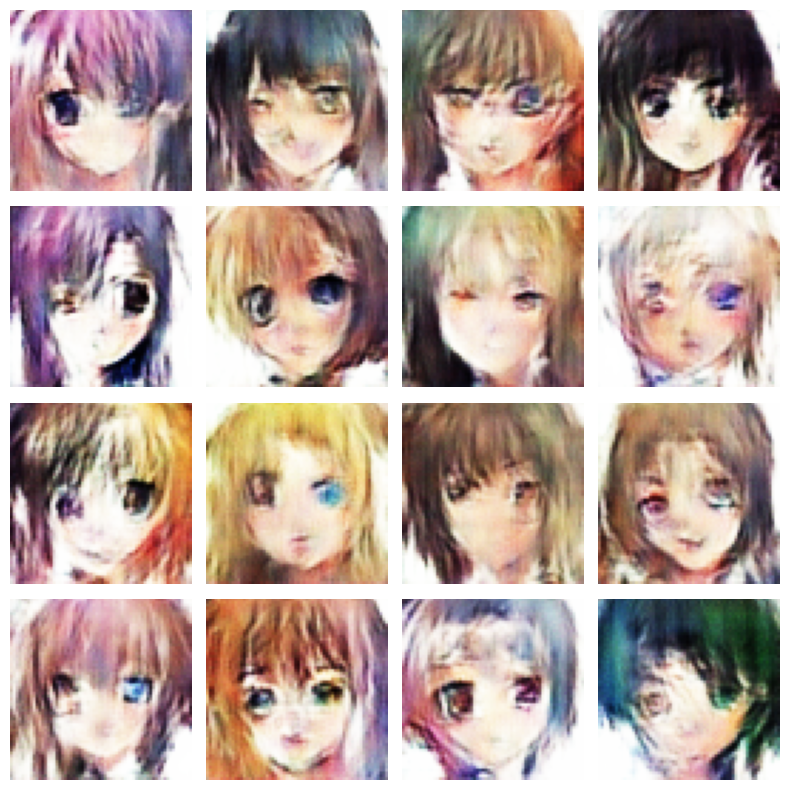

In [11]:
# Plot the generated images
fig, axs = plt.subplots(4, 4, figsize=(8, 8))
for i, ax in enumerate(axs.flat):
    ax.imshow(generated_images[i].permute(1, 2, 0))  # (C, H, W) -> (H, W, C)
    ax.axis('off')
plt.tight_layout()
plt.show()